begin to train
default acc: 0.252073

GradientDecent begin
Gradient Decent acc: 0.798538

NAG begin
NAG acc: 0.799091

RMSProp begin
RMSProp acc: 0.782016

AdaDelta begin
AdaDelta acc: 0.783981

Adam begin
Adam acc: 0.768135



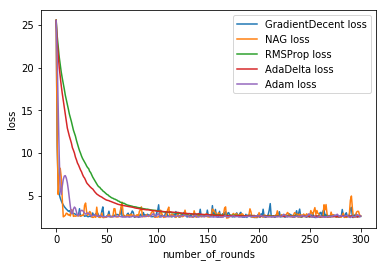

In [10]:
# -*- coding: utf-8 -*-
%matplotlib inline
# -*- coding: utf-8 -*-
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt


def loss(X,y,w,b,C):
    m = y.shape[0]
    hinge = sum(list(map(lambda x:max(0,x[0]),(1-y.A*(X*w+b).A))))
    w_2 = sum(w.A**2)[0]
    return (0.5*w_2+C*hinge)/m
    
def gradient(X,y,w,C,b):
    m = y.shape[0]
    dw = np.zeros((X.shape[1],1))
    db = 0
    indicator = 1-y.A*((X*w+b).A)
    for i in range(m):
        if indicator[i]>=0:
            dw += w - C*(y[i]*X[i]).T
            db += -C*y[i]
        else:
            dw += w 
    # print(dw,db)
    return [dw/m,db/m]

def gradientDecent(X,y,w,C,b,alpha,num_rounds,val_x,val_y): 
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,b,C))
    val_loss_history.append(loss(val_x,val_y,w,b,C))
    print("GradientDecent begin")   
    
    for i in range(num_rounds):
        random = np.random.permutation(X.shape[0])[0:100]
        gdx = X[random]
        gdy = y[random]
        
        new_w = w - gradient(gdx,gdy,w,C,b)[0]*alpha
        new_b = b - gradient(gdx,gdy,w,C,b)[1]*alpha
        w = new_w
        b = new_b
        train_loss_history.append(loss(gdx,gdy,w,b,C))
        val_loss_history.append(loss(val_x,val_y,w,b,C))
        
    return w,b,train_loss_history,val_loss_history

def NAG(X,y,w,C,b,alpha,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,b,C))
    val_loss_history.append(loss(val_x,val_y,w,b,C))
    print("NAG begin")   
    r = 0.9
    vw = np.zeros(w.shape)
    vb = 0
    
    for i in range(num_rounds):
        random = np.random.permutation(X.shape[0])[0:100]
        gdx = X[random]
        gdy = y[random]
        
        _w = w - r*vw
        gt = gradient(gdx,gdy,_w,C,b)[0]
        vw = r*vw + alpha*gt

        _b = b - r*vb
        gt = gradient(gdx,gdy,w,C,_b)[1]
        vb = r*vb + alpha*gt
        w = w - vw
        b = b - vb
        
        b = b.A1[0]

        train_loss_history.append(loss(X,y,w,b,C))
        val_loss_history.append(loss(val_x,val_y,w,b,C))
        
    return w,b,train_loss_history,val_loss_history

def RMSProp(X,y,w,C,b,alpha,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,b,C))
    val_loss_history.append(loss(val_x,val_y,w,b,C))
    print("RMSProp begin")
    
    r = 0.9
    vw = np.zeros(w.shape)
    vb = 0
    e = 1e-8
    
    for i in range(num_rounds):
        random = np.random.permutation(X.shape[0])[0:100]
        gdx = X[random]
        gdy = y[random]
        
        gt = gradient(gdx,gdy,w,C,b)[0]
        gt_2 = np.matrix(gt*gt)
        vw = r*vw + (1-r)*gt_2
        w = w - 0.01/np.sqrt(vw+e).A*(gt)

        gt = gradient(gdx,gdy,w,C,b)[1]
        gt_2 = np.matrix(gt*gt)
        vb = r*vb + (1-r)*gt_2
        b = b - 0.01/np.sqrt(vb+e)*(gt)


        train_loss_history.append(loss(X,y,w,b,C))
        val_loss_history.append(loss(val_x,val_y,w,b,C))
        
    return w,b,train_loss_history,val_loss_history

def AdaDelta(X,y,w,C,b,alpha,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,b,C))
    val_loss_history.append(loss(val_x,val_y,w,b,C))
    print("AdaDelta begin")
    
    r = 0.95
    vw = np.zeros(w.shape)
    vb = 0
    e = 1e-4
    tw = np.matrix(np.zeros(w.shape))
    tb = 0
    
    for i in range(num_rounds):
        random = np.random.permutation(X.shape[0])[0:100]
        gdx = X[random]
        gdy = y[random]
        
        gt = gradient(gdx,gdy,w,C,b)[0]
        gt_2 = np.matrix((gt)**2)
        vw = r*vw + (1-r)*gt_2
        dw = -(np.sqrt(tw+e)/np.sqrt(vw+e)).A*gt
        w = w + dw
        tw = r*tw+(1-r)*(tw.A*tw.A)

        gt = gradient(gdx,gdy,w,C,b)[1]
        gt_2 = np.matrix((gt)**2)
        vb = r*vb + (1-r)*gt_2
        dw = -(np.sqrt(tb+e)/np.sqrt(vb+e))*gt
        b = b + dw
        tb = r*tb+(1-r)*(tb*tb)

        train_loss_history.append(loss(X,y,w,b,C))
        val_loss_history.append(loss(val_x,val_y,w,b,C))
        
    return w,b,train_loss_history,val_loss_history

def Adam(X,y,w,C,b,alpha,num_rounds,val_x,val_y):
    train_loss_history = []
    val_loss_history = []
    train_loss_history.append(loss(X,y,w,b,C))
    val_loss_history.append(loss(X,y,w,b,C))
    print("Adam begin")
    
    r = 0.99
    vw = np.zeros(w.shape)
    vb = 0
    e = 1e-6
    mw = np.zeros(w.shape)
    mb = 0
    b1 = 0.9
    
    
    for i in range(num_rounds):
        random = np.random.permutation(X.shape[0])[0:100]
        gdx = X[random]
        gdy = y[random]
        
        gt = gradient(gdx,gdy,w,C,b)[0]
        gt_2 = np.matrix(gt**2)
        vw = r*vw + (1-r)*gt_2
        mw = b1*mw + (1-b1)*gt
        alp = alpha*np.sqrt(1-r)/(1-b1)
        w = w - alp*mw/np.sqrt(vw+e).A

        gt = gradient(gdx,gdy,w,C,b)[1]
        gt_2 = np.matrix(gt**2)
        vb = r*vb + (1-r)*gt_2
        mb = b1*mb + (1-b1)*gt
        alp = alpha*np.sqrt(1-r)/(1-b1)
        b = b - alp*mb/np.sqrt(vb+e).A

        train_loss_history.append(loss(X,y,w,b,C))
        val_loss_history.append(loss(val_x,val_y,w,b,C))
        
    return w,b,train_loss_history,val_loss_history



def train(X,y,val_x,val_y):
    m = X.shape[1]
    init_w = np.matrix(np.random.randn(m,1))
    print("begin to train")
    C = 6
    init_b = np.random.randn()
    alpha = 0.08
    num_rounds=300
    
    print("default acc: %f"%predict(val_x,val_y,init_w,init_b))
    print("")
    
    w,b,train_loss_history,loss_history = gradientDecent(X,y,init_w,C,init_b,alpha,num_rounds,val_x,val_y)
    print("Gradient Decent acc: %f"%predict(val_x,val_y,w,b))
    print("")
    w,b,train_loss_history,NAG_loss_history = NAG(X,y,init_w,C,init_b,alpha,num_rounds,val_x,val_y)
    print("NAG acc: %f"%predict(val_x,val_y,w,b))
    print("")
    w,b,train_loss_history,RMSProp_loss_history = RMSProp(X,y,init_w,C,init_b,alpha,num_rounds,val_x,val_y)
    print("RMSProp acc: %f"%predict(val_x,val_y,w,b))
    print("")
    w,b,train_loss_history,AdaDelta_loss_history = AdaDelta(X,y,init_w,C,init_b,alpha,num_rounds,val_x,val_y)
    print("AdaDelta acc: %f"%predict(val_x,val_y,w,b))
    print("")
    w,b,train_loss_history,Adam_loss_history = Adam(X,y,init_w,C,init_b,alpha,num_rounds,val_x,val_y)
    print("Adam acc: %f"%predict(val_x,val_y,w,b))
    print("")
    plt.plot(np.arange(num_rounds+1),loss_history,label='GradientDecent loss')
    plt.plot(np.arange(num_rounds+1),NAG_loss_history,label='NAG loss')
    plt.plot(np.arange(num_rounds+1),RMSProp_loss_history,label='RMSProp loss')
    plt.plot(np.arange(num_rounds+1),AdaDelta_loss_history,label='AdaDelta loss')
    plt.plot(np.arange(num_rounds+1),Adam_loss_history,label='Adam loss')
    plt.legend(loc=1)
    plt.xlabel('number_of_rounds')
    plt.ylabel('loss')
    return w,b
    
def predict(X,y,w,b):
    pred = X*w+b
    pred_y = list(map(lambda x:1 if x[0]>0 else -1,pred.A))
    acc = (y.A1==pred_y).sum()/len(y.A)
    return acc


def getData():
    X,y = datasets.load_svmlight_file('./a9a',n_features=123)
    X = np.matrix(X.toarray())
    ones = np.matrix(np.ones((X.shape[0],1)))
    train_x = np.concatenate((ones,X),axis=1)
    train_y = np.matrix(y).T
    
    X,y = datasets.load_svmlight_file('./a9a.t',n_features=123)
    X = np.matrix(X.toarray())
    ones = np.matrix(np.ones((X.shape[0],1)))
    test_x = np.concatenate((ones,X),axis=1)
    test_y = np.matrix(y).T
    return train_x,test_x,train_y,test_y
    

train_x,test_x,train_y,test_y = getData()
w,b = train(train_x,train_y,test_x,test_y)


# -*- coding: utf-8 -*-







## This is linear classification base on SVM